# Prelude
Picture this: you're grappling with some data point $x$, and you're itching to unveil its mysterious partner $y$. But let's be honest—you're not embarking on a quixotic quest to unearth the *original* distribution $P(x,y)$. No, that's a path for the brave or the bemused. You, my friend, are on a more pragmatic journey to simply predict $y$, given $x$.<br>$\hspace{2em}$
And if this $y$ you seek is a denizen of the binary realm—where it can only pledge allegiance to -1 or 1—you've just waltzed into the festive gala of discriminative binary classification methods. Amidst this revelry, there's a legend whispered with reverence—a model both stalwart and straightforward—the perceptron (the perceptron... the perceptron...). 
It's not just a mere algorithm; it's the heartthrob of linear classifiers, standing proudly at the core of the machine learning pantheon.

# Perceptron
In this notebook, we will explore the perceptron, an algorithm as ancient as the queen herself; you all 
know it and probably had to code it for some class assignment.
Its popularity stems from its simplicity. It is a binary linear classification model, which means that for some input *x*, it will *classify* this input into one of *two* classes (binary)-in our example, we will use -1 and 1. <br> Why would you want to be able to classify anything into one of two classes? You most likely had that one classmate (if you did not, it is probably you) who, during the introductory statistics and probability class said, smirking with the smile of he-who-conquered-the-universe, that everything either is or is not; therefore, the probability of everything is 50%; given his statement (do not even try to dispute it buddy; you will only prompt him to more omniscient proclamations), virtually anything can be modeled as a binary classification, so there you go. Anything is quite a massive set of applications, no?

The algorithm:

1. Initialize parameters $w$ and $b$ to zeros
2. For $t$ = 1 to $\tau$ (number of iterations)
3. $\hspace{2em}$ For $i$ = 1 to $N$ (number of training points)
4. $\hspace{4em}$ if $y_i (w^T x_i + b) \leq 0$
5. $\hspace{6em}$ $w = w + \eta(y_i x_i)$
6. $\hspace{6em}$ $b = b + \eta(y_i)$

Where $\eta$ is a learning rate hyper-parameter, each point $x_i \in R^N$, $y_i \in \{-1,1\}$, $w \in R^N$ and $b \in R$ . We can stop training after no update has been done during one whole iteration.<br><br>

That is it, that is the algorithm.

... umm, why?
Why does this update formula work?

Let us first take a close look at the prediction, the vaticination, the prognostication:

## Prediction

$\hspace{2em} w^T x_i + b$

The expression first makes a dot product $w^T x_i$ and adds the bias term $b$, but what does it actually mean to take a dot product of two vectors?

#### Dot product
The dot product of two vectors $a = [a_1, a_2, ..., a_n]$ and $b = [b_1, b_2, ..., b_n]$ is defined as $a \cdot b = a^Tb = \sum_{i=1}^{n}a_i b_i$.
The geometric definition is defined as $a \cdot b = ||a|| \space ||b|| \cos{\theta}$.

One way of looking at a dot product, is you are decomposing the original vectors $a$ and $b$ into a linear combination of the canonical basis: 

$a = a_1  [1, 0, ..., 0] + a_2  [0, 1, ..., 0] + ... + a_n  [0, 0, ..., 1]$

$b = b_1  [1, 0, ..., 0] + b_2  [0, 1, ..., 0] + ... + b_n  [0, 0, ..., 1]$

and then summing the product of their respective "sub vectors". Let us look at a visual example:

![dotproduct](images/dotproduct.png) 

Okay, that is the process of computing the dot product, but what is the result? One interpretation is, that the result is a scalar representing "how much do these two vectors agree on their (weighted) direction". Here is what I mean by this mathematically flawed statement: 

For simplicity, let us assume that vectors $a$ and $b$ are of two dimensions. When we calculate their dot product, we compare their x-components by taking their product. If they share the same orientation, this product will be positive. If they share the same orientation and they are large, this product will be positive and large-we can say that they strongly agree on their direction. If these subcomponents differ in direction, the result of their product will be negative. If they differ in their direction and they are large, this product will be negative and large.<br> $\hspace{2em}$ If the resulting number of a dot product of two vectors is positive, it means that these two vectors "more agree on their direction than they disagree".

In our visual example, the x-components have the same orientation, so their product is going to be positive (2\*2=4), whereas their y-components are of opposite direction and so their product is goint to be negative (2\*-1=-2), but because the x-components *agree* more than their y-components *disagree*, the resulting dot product will be positive (4 + (-2) = 2).

If the two vectors $a$ and $b$ were perpendicular to each other, their dot product would be zero.

Let us bring this back to our perceptron example, in this case we have a vector $w$ and a bias $b$ (our parameters) and a vector $x_i$ (one point from our training set) and its respective label $y_i$. Let us ommit the bias term for now and focus only on the vectors and label.<br> $\hspace{2em}$ When we call dot product $w^T x_i$ we are asking: "Do these two vectors *agree* on their direction more than they *disagree*?" And if they do, their product is positive. If *y_i* is 1, the expression $y_i(w^T x_i)$ is positive. This for us means we have correctly classified $x_i$. And if $w^T x_i$ is negative, but $y_i$ is positive or if $w^T x_i$ is positive and $y_i$ is negative, the resulting expression $y_i(w^T x_i)$ is going to be negative-we have misclassified *x_i* (still keep ignoring the bias term $b$). 

So our goal so far can be described as *finding a vector $w$ such that it will point to the direction of all $x_i$ points whose $y_i = 1$, and away from the points $x_j$ for which $y_j = -1$*.

Hey, this is starting to make sense; let us look at an example of how perceptron training might end up and what is the resulting $w$ (the bias term is probably trying to escape out of your thought basement right now, so hit him a few times and lock him up).

![perceptron-result1](images/perceptron-result1.png)

Okay, so the vector $w$ indeed is pointing towards the positive examples (blue) and away from the negative ones (red) (note that this is not the only possible result we might get). But this representation makes it hard to find the *decision boundary*. What is that? It is the border between the two classes. On one side, you are +1; cross it, and you become -1.

How should we visualize such a boundary? Well, from what I told you just now, on one side, there are the positive labels, and on the other side, there are the negative labels, and precisely on the boundary, there are... neutral examples? ~~Hold on, this is not a binary classification! Someone call the poli~~ Haha, apologies for that guy. For points exactly on the boundary, we can say they belong to either one of the two classes. It really does not matter much.<br>
So, given this description, can you think of where the boundary should be?

That is right! It is represented by the vector whose dot product with the vector $w$ is zero. In other words, it is a line perpendicular to the vector $w$.

![decison-boundary](images/decision-boundary.png)

Great! We've grasped the result of the perceptron. Suddenly, you hear soft footsteps approaching. Turning around, you're faced with a menacing hooded figure approaching, a muffled laugh emanating from beneath his robes. "Foolish mortal, your model is laughably weak! Behold this simple case where your model fails," he taunts, presenting a picture in his decayed hands:

![decision-boundary-fail](images/decision-boundary-fail.png)

He is correct; there is no way to position the vector $w$ so that the decision boundary correctly splits the two point clusters... You've endured so much, unraveled ancient mysteries, only to fall short at the last hurdle.
But just as you are about to give in to the desperation, an inner strength breaks free. It's the bias term $b$, previously locked away within you! It surges forward with such might that it scatters the shadows, shouting, "Yes, we can!". With its help, we can easily shift the decision boundary so that it classifies our points correctly:

![decision-boundary-w-bias](images/decision-boundary-w-bias.png)

<br><br>
To conclude our understanding so far:
The vector $w$ is a normal vector to the decision boundary, and the perceptron algorithm aims to learn such $w$ that points at the positive samples ($y_i = 1$) and away from the negative examples. The bias $b$ is there to help us shift the decision boundary if needed. <br>(Note: Mind not the peasants who will mock this representation and implementation, saying that you can easily augment the points $x_i$ by appending 1 to their end, and then you only have one parameter vector w' = [w b]; they bring nothing new to the table and are only wasting oxygen)

We now have a firm understanding of the parameters, their visual representation, and a typical algorithm result. Let us take a closer look at the training process and why it works.

## Training

In [1]:
%pwd

'/Users/vojtechbartek/Documents/my-model-zoo/src/notebooks'

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import sys

# Add path to the parent directory to import modules
sys.path.append("../..")
from src.models.classification.perceptron import Perceptron

plt.style.use(
    "https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle"
)

In [2]:
X = np.array([[1, 1], [-2, 2], [2, 2]])
y = np.array([[-1], [-1], [1]])

11
[10. 10.]
[-30]


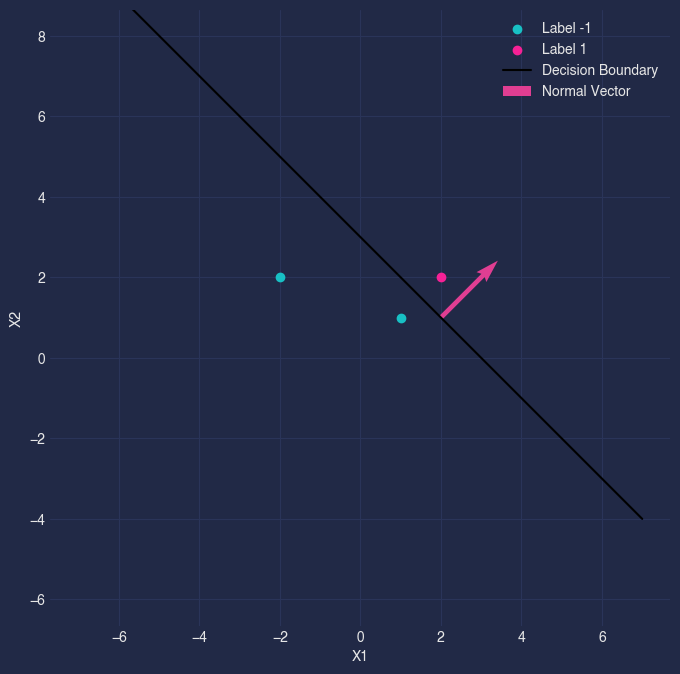

In [4]:
classifier = Perceptron(learning_rate=10)
classifier = classifier.fit(X, y, 10, visualize=True, frame_rate=1)
print(classifier.steps)
print(classifier.w)
print(classifier.b)